In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import datetime as dt
import math as mt
# importing libraries
import statsmodels.api as sm
import pandas as pd 

import statsmodels.tools.eval_measures as smeval

### Data

In [2]:
df = pd.read_excel('Emhjellen_meteorological_Vestland_1991_2020.xlsx')
df= df.dropna()

In [3]:
year = df['Date'].dt.year
month = df['Date'].dt.month

In [4]:
df['Temp*Prec'] = df['Mean_daily_temp']*df['Daily_prec']

df['dummy_variable'] = 1

### Seasons

In [5]:
# rockfall climate, daily temp

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)


# summer 

jun = df[month == 6]
jul = df[month == 7]
aug = df[month == 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)


# autumn

sep = df[month == 9]
okt = df[month == 10]
nov = df[month == 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

# winter

dec = df[month == 12]
jan = df[month == 1]
feb = df[month == 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

In [6]:
Seasons = [spring, summer, autumn, winter]

In [7]:
#Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

IndentationError: unexpected indent (<ipython-input-7-95b40ee2a2b6>, line 2)

In [ ]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]

In [10]:
Months = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

### Daily temperature for each month for Vestland, ignore locations


In [14]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []
likelihood_chi = []
likelihood = []
aic = []
llr_pvalue = []

for k in Months:
    mean_daily_temp = k['Daily_prec'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland.append(log_reg.bse[1])
    likelihood_chi.append((log_reg.llr))
    likelihood.append(log_reg.llf)
    llr_pvalue.append(log_reg.llr_pvalue)
    aic.append(log_reg.aic)

Optimization terminated successfully.
         Current function value: 0.329312
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.354077
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.363661
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218955
  

In [18]:
'{:f}'.format(1e-06)

'0.000001'

In [16]:
llr_pvalue

[1.1692487701263878e-34,
 1.367084856452401e-23,
 8.464888065251843e-13,
 1.1854670276245003e-05,
 0.019014587671654155,
 2.1544472139431383e-10,
 3.4440186616657524e-09,
 2.849851135818392e-07,
 6.932569269880428e-29,
 5.058929937004402e-09,
 1.2467199097338387e-09,
 2.2860693421070053e-28]

In [15]:
aic

[4571.555744861198,
 4480.242535000521,
 5314.173134998246,
 3930.368740297022,
 3098.8900502460538,
 2538.004509001753,
 2201.1625017885185,
 2526.024643842594,
 2806.425523619893,
 2701.9662136432876,
 2838.5735985866113,
 3407.8874374860015]

### Daily prec for each season

In [33]:
intercepts_seasons = []
slope_seasons = []
standard_error_coef_seasons = []
standard_error_slope_seasons = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    # rockfall climate, daily temp

    # spring
    march = i[month== 3]
    april = i[month== 4]
    may = i[month== 5]

    spring = [march, april, may]
    spring = pd.concat(spring)


    # summer 
    jun = i[month == 6]
    jul = i[month == 7]
    aug = i[month == 8]

    summer = [jun, jul, aug]
    summer = pd.concat(summer)


    # autumn
    sep = i[month == 9]
    okt = i[month == 10]
    nov = i[month == 11]

    autumn = [sep, okt, nov]
    autumn = pd.concat(autumn)

    # winter
    dec = i[month == 12]
    jan = i[month == 1]
    feb = i[month == 2]
    
    winter = [dec, jan, feb]
    winter = pd.concat(winter)
    
   
    Seasons = [spring,summer,autumn,winter]
    
    for k in Seasons:
            mean_daily_temp = k['Daily_prec'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])

    intercepts_seasons.append(intercepts_k)
    slope_seasons.append(slope_k)
    standard_error_coef_seasons.append(standard_error_coef_k)
    standard_error_slope_seasons.append(standard_error_slope_k)
            

<ipython-input-33-e59ca9d49027>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  march = i[month== 3]
<ipython-input-33-e59ca9d49027>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  april = i[month== 4]
<ipython-input-33-e59ca9d49027>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may = i[month== 5]
<ipython-input-33-e59ca9d49027>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jun = i[month == 6]
<ipython-input-33-e59ca9d49027>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jul = i[month == 7]
<ipython-input-33-e59ca9d49027>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aug = i[month == 8]
<ipython-input-33-e59ca9d49027>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sep = i[month == 9]
<ipython-input-33-e59ca9d49027>:35: UserWarning: Boolean Seri

Optimization terminated successfully.
         Current function value: 0.250835
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357918
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.353424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.165324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225268
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389546
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.240124
  

### Daily prec for each month


In [9]:
intercepts = []
slope = []
standard_error_coef = []
standard_error_slope = []
#probability_rockfall = []
significance = []
log_likelihood = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    probability_rockfall_k = []
    significance_k = []
    log_likelihood_k = []
    
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k['Daily_prec'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])
            
            prob_rockfall =  np.exp(log_reg.bse[0])/(1+np.exp(log_reg.bse[0]))
            probability_rockfall_k.append(prob_rockfall)
            
            log_likelihood_k.append(log_reg.llr)
            
            if log_reg.llr_pvalue > 0.05:
                significance_k.append('no')
            if log_reg.llr_pvalue < 0.05:
                significance_k.append('yes')
                
                        
    intercepts.append(intercepts_k)
    slope.append(slope_k)
    standard_error_coef.append(standard_error_coef_k)
    standard_error_slope.append(standard_error_slope_k)
    #probability_rockfall.append(probability_rockfall_k)
    significance.append(significance_k)
    log_likelihood.append(log_likelihood_k)
  
            
            
            
          

<ipython-input-9-0887b5a2c745>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-9-0887b5a2c745>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.296038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.256905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.189563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.140733
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202570
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.165457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304148
  

Optimization terminated successfully.
         Current function value: 0.237012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.159469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.118288
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.086410
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203227
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.194311
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.150624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214707
  

Optimization terminated successfully.
         Current function value: 0.148736
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.064951
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.121151
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.096692
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.107802
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080257
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.063979
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.030801
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.044109
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.057442
 

In [35]:
log_likelihood

[[-138.54586468904716,
  -104.81727493874591,
  -80.37457089301249,
  -107.33134941624608,
  -57.1377705373929,
  -81.43316390327612,
  -105.51468958109383,
  -66.01740553040618,
  -83.5786963946983,
  -133.82533635554876,
  -185.10788203438264,
  -155.17806618964124],
 [-230.12385368576207,
  -133.87078386096914,
  -109.08497058795146,
  -68.67875168344506,
  -35.19116557031052,
  -91.14727010625963,
  -92.66294664903242,
  -76.44023858920497,
  -94.01456676994802,
  -129.04932528086084,
  -215.89683046719097,
  -171.02859986241418],
 [-238.50556375569545,
  -126.95095300188925,
  -83.40191162966636,
  -83.29434232885438,
  -101.97237430744678,
  -115.24742154513996,
  -113.59677229322554,
  -116.91667078166103,
  -127.84853584099046,
  -158.49939594741912,
  -260.33980391064017,
  -236.39144959621956],
 [-106.77306050781417,
  -105.60685186678266,
  -67.4343076966339,
  -70.93107423682972,
  -82.08879015031701,
  -66.49986350791777,
  -66.19613197941595,
  -46.58001479228418,
  -55.5

### Daily prec for each month and location


In [36]:
intercepts_month = []
slope_month = []
standard_error_coef_month = []
standard_error_slope_month = []


Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

for i in Months:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        print(k) 
        mean_daily_temp = k['Daily_prec'].values
        mean_daily_temp.reshape(-1, 1)

        y = k['Rockfall']

        #centering the model
        #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
        log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
        intercepts_k.append(log_reg.params[0])
        slope_k.append(log_reg.params[1])
    
        standard_error_coef_k.append(log_reg.bse[0])
        standard_error_slope_k.append(log_reg.bse[1])

    intercepts_month.append(intercepts_k)
    slope_month.append(slope_k)
    standard_error_coef_month.append(standard_error_coef_k)
    standard_error_slope_month.append(standard_error_slope_k)
            
        
            

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
82            428 1991-03-05         1             2.58        0.00         0   
98            432 1991-03-09         1             6.90        2.10         0   
121           433 1991-03-10         1             7.24        1.76         0   
139           437 1991-03-14         1             5.40       14.23         0   
161           451 1991-03-28         1             6.93        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74864       10677 2019-03-27         1             3.92       11.96         0   
74879       10678 2019-03-28         1             7.22        3.94         0   
74906       10679 2019-03-29         1             8.42       15.32         0   
74915       10680 2019-03-30         1             5.68       36.80         0   
74937       10681 2019-03-31         1             1.88       14.31         0   

       Temp*Prec  dummy_var

[408 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.256905
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
189           458 1991-04-04         2             0.08        7.62         0   
214           470 1991-04-16         2            -3.62       15.91         0   
216           472 1991-04-18         2            -7.44        5.30         0   
231           480 1991-04-26         2            -0.74        0.00         0   
1131          825 1992-04-05         2            -3.94        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75336       10707 2019-04-26         2             8.26        0.00         0   
75356       10708 2019-04-27         2             9.36        0.00         0   
75373       10709 2019-04-28         2             9.36        0.60         0   
75381       10710 2019-04-29         2             8.98        0.

Optimization terminated successfully.
         Current function value: 0.279407
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
196           458 1991-04-04        16             4.90        5.37         0   
200           470 1991-04-16        16             4.14        4.69         0   
223           472 1991-04-18        16             1.84        0.00         0   
240           480 1991-04-26        16             5.62        0.00         0   
1132          825 1992-04-05        16             1.79        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75344       10707 2019-04-26        16            13.37        0.71         0   
75345       10708 2019-04-27        16            10.86        5.05         0   
75368       10709 2019-04-28        16             8.80       16.45         0   
75384       10710 2019-04-29        16             8.92        2.91         0   
75396  

[421 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.167758
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
261           497 1991-05-13        11             6.69        4.64         0   
1269          852 1992-05-02        11             5.92        5.10         0   
1284          863 1992-05-13        11             6.33        8.60         0   
1294          878 1992-05-28        11            16.25        0.00         0   
1304          879 1992-05-29        11            17.65        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75816       10738 2019-05-27        11             8.71        0.00         0   
75846       10739 2019-05-28        11             7.61        0.00         0   
75847       10740 2019-05-29        11             5.31        2.75         0   
75875       10741 2019-05-30        11             6.70       10.

[438 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.280609
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
270           518 1991-06-03         7             6.16        0.00         0   
295           522 1991-06-07         7             4.89       11.28         0   
310           533 1991-06-18         7             9.71        0.00         0   
312           536 1991-06-21         7             8.43        0.58         0   
330           539 1991-06-24         7             9.32        6.95         0   
...           ...        ...       ...              ...         ...       ...   
76276       10768 2019-06-26         7            12.44        5.45         0   
76294       10769 2019-06-27         7            11.54        0.00         0   
76309       10770 2019-06-28         7            12.20        0.00         0   
76329       10771 2019-06-29         7            13.40        0.

Optimization terminated successfully.
         Current function value: 0.030801
         Iterations 11
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
348           552 1991-07-07         1            16.43        0.00         0   
372           554 1991-07-09         1            20.55        0.00         0   
389           565 1991-07-20         1            14.51        0.00         0   
398           566 1991-07-21         1            14.52        2.41         0   
418           567 1991-07-22         1            13.07        3.96         0   
...           ...        ...       ...              ...         ...       ...   
76473       10780 2019-07-08         1            12.27        0.40         0   
76485       10781 2019-07-09         1            12.82        0.00         0   
76493       10782 2019-07-10         1            13.86        0.00         0   
76518       10783 2019-07-11         1            13.71        0.00         0   
76528 

Optimization terminated successfully.
         Current function value: 0.086410
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
352           552 1991-07-07         9            18.38        0.00         0   
367           554 1991-07-09         9            20.35        1.36         0   
377           565 1991-07-20         9            14.14        3.15         0   
403           566 1991-07-21         9            14.35        0.00         0   
411           567 1991-07-22         9            13.90        0.00         0   
...           ...        ...       ...              ...         ...       ...   
76474       10780 2019-07-08         9            11.57        0.00         0   
76490       10781 2019-07-09         9            12.05        0.00         0   
76496       10782 2019-07-10         9            13.48        0.00         0   
76512       10783 2019-07-11         9            14.65        0.00         0   
76534  

Optimization terminated successfully.
         Current function value: 0.253001
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
450           578 1991-08-02         6        17.730000        0.00         0   
457           580 1991-08-04         6        15.880000        6.79         0   
472           584 1991-08-08         6        11.950000        0.00         0   
493           591 1991-08-15         6         9.880000        2.22         0   
510           596 1991-08-20         6        11.450000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
71533       10466 2018-08-28         6         7.590000        3.30         0   
71550       10467 2018-08-29         6         9.580000        0.20         0   
71564       10468 2018-08-30         6         9.770000        8.55         0   
71569       10469 2018-08-31         6         6.650000        0.30         0   
76546  

[392 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.269170
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
551           608 1991-09-01         2            10.96        0.00         0   
560           609 1991-09-02         2            14.57        0.00         0   
573           612 1991-09-05         2             4.38       11.70         0   
585           613 1991-09-06         2             1.58        2.01         0   
609           623 1991-09-16         2             5.87       17.21         0   
...           ...        ...       ...              ...         ...       ...   
71979       10495 2018-09-26         2             3.37       56.30         0   
72001       10496 2018-09-27         2             1.87       13.66         0   
72031       10497 2018-09-28         2            -0.53       22.84         0   
72035       10498 2018-09-29         2            -0.73        9.

Optimization terminated successfully.
         Current function value: 0.162283
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
538           608 1991-09-01        12            13.19        0.00         0   
556           609 1991-09-02        12            14.06        0.00         0   
569           612 1991-09-05        12             9.66       15.44         0   
596           613 1991-09-06        12             7.66        0.00         0   
601           623 1991-09-16        12             9.95       12.16         0   
...           ...        ...       ...              ...         ...       ...   
71996       10495 2018-09-26        12             8.89       41.88         0   
71999       10496 2018-09-27        12             8.64       11.48         0   
72019       10497 2018-09-28        12             5.61       19.42         0   
72040       10498 2018-09-29        12             5.44        5.12         0   
72059  

[427 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.331069
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
631           640 1991-10-03         8         0.750000        0.14         0   
638           641 1991-10-04         8         0.550000        0.97         0   
664           649 1991-10-12         8         3.860000        0.10         0   
671           657 1991-10-20         8        -1.270000        0.00         0   
689           658 1991-10-21         8        -1.880000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72501       10527 2018-10-28         8        -5.890000        0.00         0   
72510       10528 2018-10-29         8        -8.200000        0.00         0   
72534       10529 2018-10-30         8        -4.320000        1.87         0   
72543       10530 2018-10-31         8         0.340000        0.

[393 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.239223
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
701           674 1991-11-06         3             1.23        1.29         0   
725           687 1991-11-19         3            -4.00        0.00         0   
745           688 1991-11-20         3            -4.52        0.00         0   
1589         1050 1992-11-16         3            -3.91        0.00         0   
1596         1052 1992-11-18         3            -4.89        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72944       10556 2018-11-26         3            -3.78        0.00         0   
72950       10557 2018-11-27         3            -3.94        0.00         0   
72963       10558 2018-11-28         3            -2.15        0.00         0   
72989       10559 2018-11-29         3             3.34        5.

[432 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.426105
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
698           674 1991-11-06        15        -4.250000        0.00         0   
728           687 1991-11-19        15        -8.650000        0.00         0   
744           688 1991-11-20        15        -9.750000        0.00         0   
1588         1050 1992-11-16        15        -8.630000        0.00         0   
1605         1052 1992-11-18        15        -7.730000        5.26         0   
...           ...        ...       ...              ...         ...       ...   
72967       10558 2018-11-28        15        -7.190000        0.00         0   
72987         341 2018-11-29        15         1.337641        4.77         1   
72992       10559 2018-11-29        15        -4.130000        4.50         0   
73003       10560 2018-11-30        15         0.470000        9.

[416 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.158370
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
761           700 1991-12-02        10         0.870000        1.29         0   
779           703 1991-12-05        10         0.270000        0.00         0   
793           704 1991-12-06        10        -3.530000        0.00         0   
799           716 1991-12-18        10         2.220000       46.70         0   
819           720 1991-12-22        10        -5.070000        2.14         0   
...           ...        ...       ...              ...         ...       ...   
73432       10588 2018-12-28        10         2.330000       18.47         0   
73459       10589 2018-12-29        10         1.480000        6.59         0   
73465       10590 2018-12-30        10         0.260000        8.67         0   
73490       10591 2018-12-31        10        -0.200000       20.

[435 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.226285
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
11            367 1991-01-03         6            -2.03        5.76         0   
880           733 1992-01-04         6            -0.11       18.38         0   
900           734 1992-01-05         6            -3.71        5.77         0   
918           737 1992-01-08         6            -0.45        3.91         0   
940           738 1992-01-09         6            -2.44        0.00         0   
...           ...        ...       ...              ...         ...       ...   
73896       10618 2019-01-27         6            -8.55        0.00         0   
73912       10619 2019-01-28         6           -11.38        0.00         0   
73928       10620 2019-01-29         6           -13.56        0.45         0   
73949       10621 2019-01-30         6           -10.64        0.

Optimization terminated successfully.
         Current function value: 0.368594
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
31            401 1991-02-06         2        -9.940000        0.00         0   
40            410 1991-02-15         2       -11.820000        3.48         0   
63            414 1991-02-19         2        -8.140000        5.69         0   
64           6444 1991-02-22         2         0.941565        4.97         1   
73            418 1991-02-23         2        -3.930000        6.08         0   
...           ...        ...       ...              ...         ...       ...   
74359       10646 2019-02-24         2         4.070000        5.29         0   
74379       10647 2019-02-25         2        -0.130000        2.30         0   
74391       10648 2019-02-26         2         1.770000        2.60         0   
74416       10649 2019-02-27         2         2.480000        0.00         0   
74433  

[486 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.551462
         Iterations 5
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
25            401 1991-02-06        15            -9.63        0.00         0   
47            410 1991-02-15        15           -11.61        1.46         0   
58            414 1991-02-19        15           -10.57        1.82         0   
69            418 1991-02-23        15            -3.91       15.48         0   
1017          778 1992-02-18        15           -13.27        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74367       10646 2019-02-24        15             2.99        0.60         0   
74376       10647 2019-02-25        15            -1.14        1.04         0   
74386       10648 2019-02-26        15             2.19        1.43         0   
74408       10649 2019-02-27        15             2.63        0.

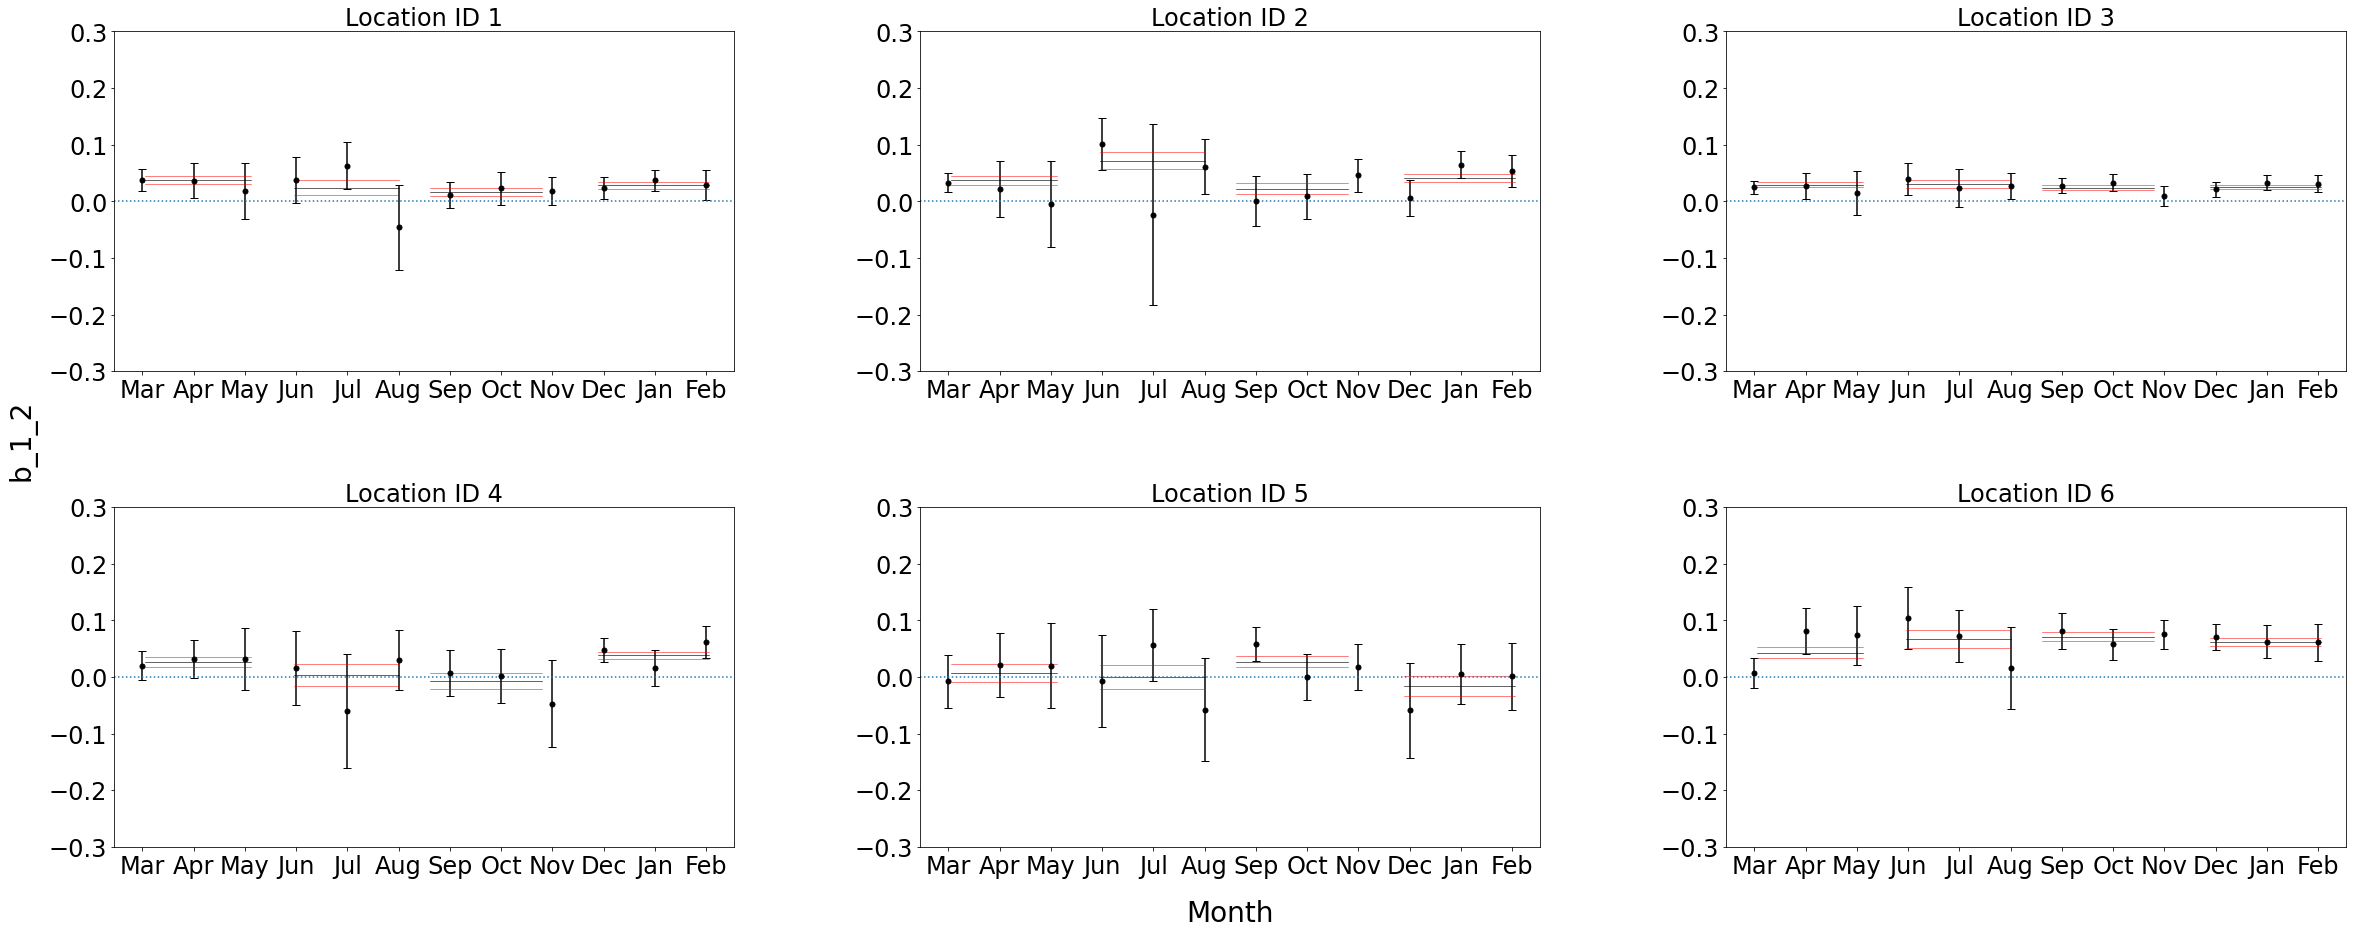

In [43]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.3,0.3)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1_2",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_prec_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

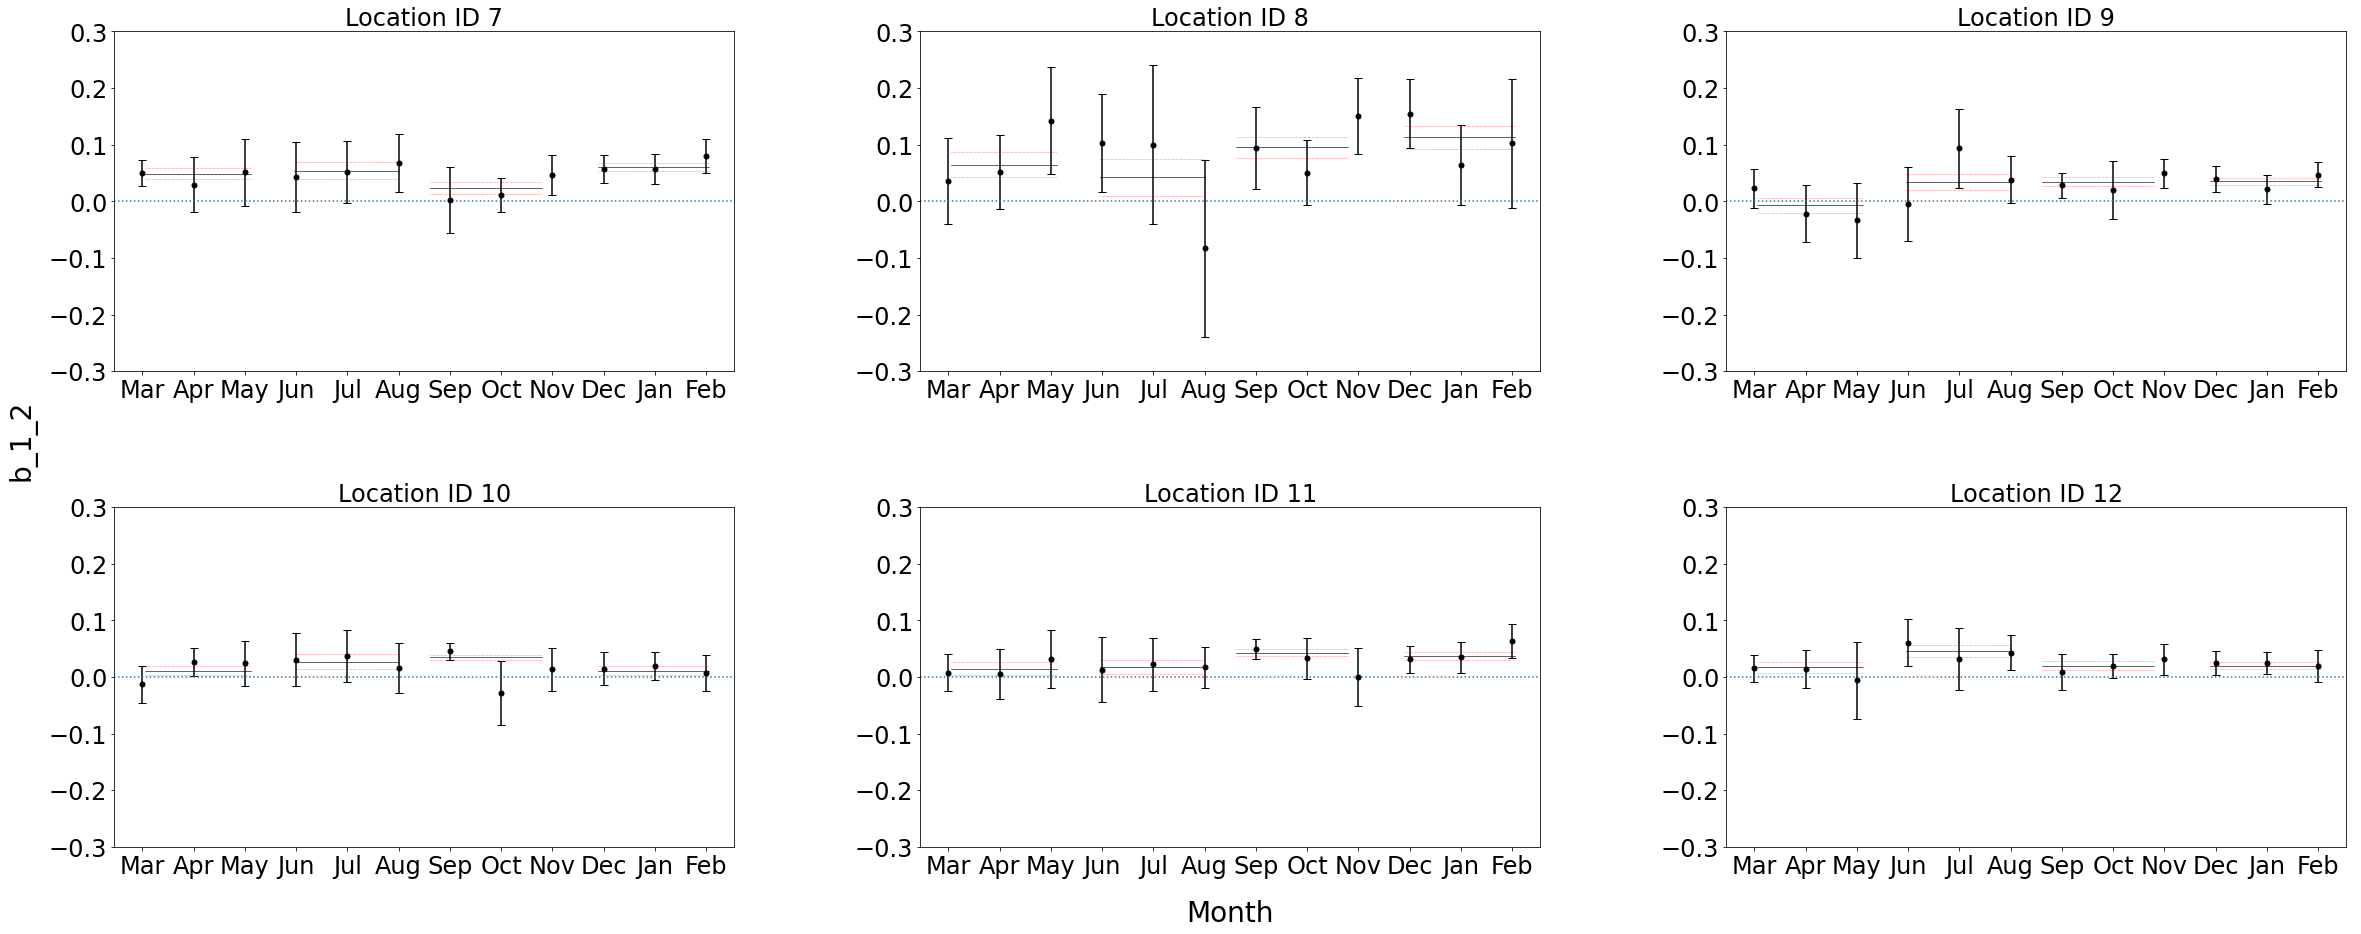

In [42]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error1 = standard_error_slope*2
    y_error1 = y_error1[i]


        
    plt.errorbar(x, y, yerr = y_error1,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.3,0.3)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1_2",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_prec_2.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

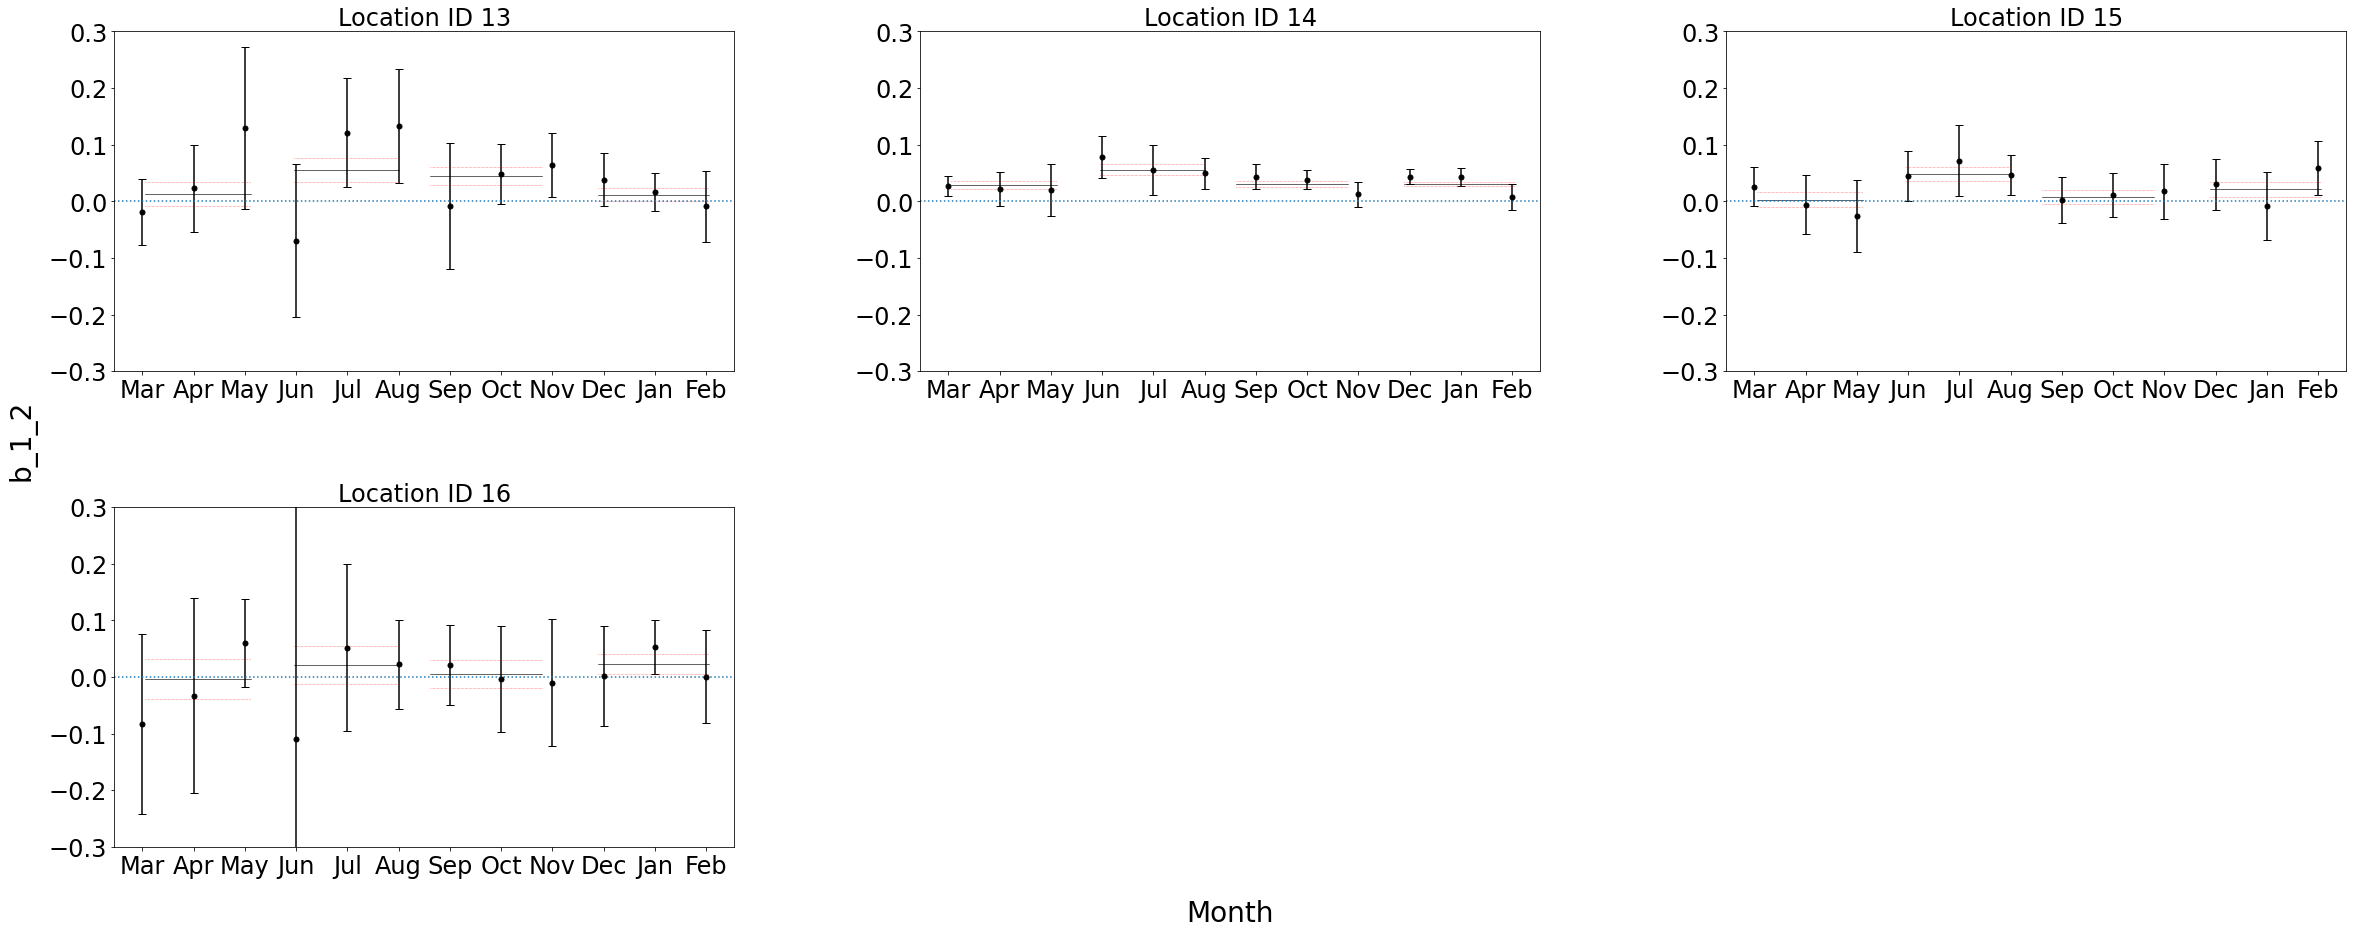

In [41]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(12,16):
    plt.subplot(2,3,i-11)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.3,0.3)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)
    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1_2",fontsize = 28,labelpad=55)
    
plt.savefig('Loc_slope_mean_daily_prec_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

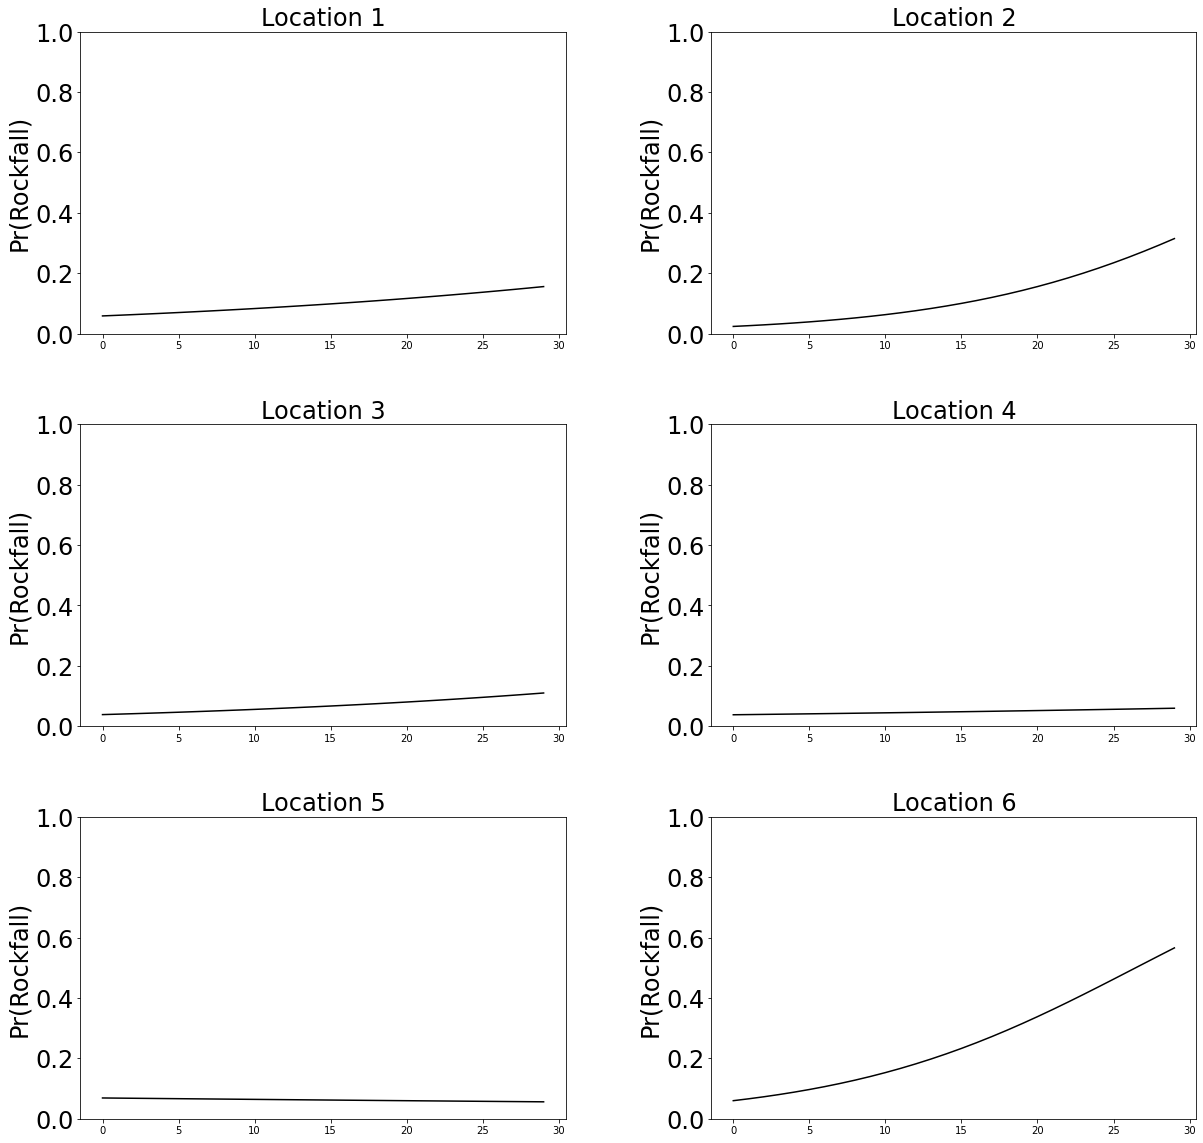

In [40]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(0,6):
    plt.subplot(3,2,i+1)
    x= np.arange(0,30)
    #x = np.arange(1,13)
    y = intercepts[i][3] + slope[i][3]*x
    prob = np.exp(y)/(1+np.exp(y))
        
    plt.plot(x, prob, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel(y)
    plt.ylabel('Pr(Rockfall)',fontsize=24)
    plt.ylim(0,1)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Prob_mean_daily_prec_rockfall.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

### Summary tables

In [17]:
len(significance_slope)

16

In [18]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Intercept estimate': [item[i] for item in intercepts],
        'SE intercept': [item[i] for item in standard_error_coef],
        'p < 0.05': [item[i] for item in significance_coef],
        'Slope estimate': [item[i] for item in slope],
        'SE slope': [item[i] for item in standard_error_slope],
        'p < 0.05 ': [item[i] for item in significance_slope]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_daily_precipitation_summary' + str(i) + '.xlsx')

In [10]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Log-likelihood':[item[i] for item in log_likelihood]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_daily_precipitation_LogLikelihood' + '.xlsx')

In [11]:
data

,Location,Log-likelihood
0,1,4.443444e+00
1,2,1.299539e+01
2,3,1.943105e+01
3,4,1.726884e+01
4,5,6.389562e-04
5,6,1.420107e+01
6,7,3.022251e+01
7,8,2.607683e+00
8,9,1.896976e+01
9,10,1.562873e-01


In [12]:
mean_llh_months = np.mean(log_likelihood, axis=0)
mean_llh_months = pd.DataFrame(mean_llh_months)
mean_llh_months.to_excel('Log_likelihood_daily_prec' + '.xlsx')

In [13]:
mean_llh_months

,0
0,5.324001
1,2.667055
2,1.875643
3,4.753645
4,3.422239
5,3.703959
6,11.210376
7,4.305007
8,6.589804
9,12.029155
